# In this jupyter code we just perform some EDA Techniques on <font color=red> Netflix </font> dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Netflix_Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Lets find any duplicates present in data and remove them

Wait : What is duplicate data 🤔?<br>
    --> The most visible form of duplicate data is a complete carbon copy of another record,which is bad for model.

In [8]:
df.duplicated().sum()

2

In [9]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

# Now let's check null values

In [12]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

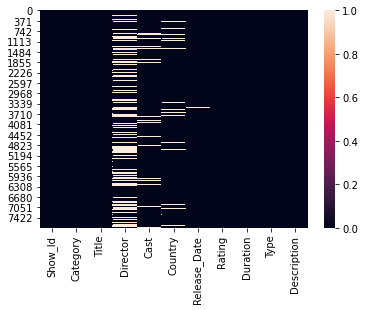

In [14]:
import seaborn as sns
sns.heatmap(df.isnull())

##### Most null values are present in the director field

In [16]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


##   <font color='green'>Lets check my favourite shows  in netflix exists in our data i.e  How to Sell Drugs Online (Fast) & Money Heist </font> 

In [27]:
df[df["Title"].isin(["How to Sell Drugs Online (Fast)"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2849,s2850,TV Show,How to Sell Drugs Online (Fast),NaN,"Maximilian Mundt, Danilo Kamperidis, Lena Klen...",Germany,"July 21, 2020",TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Com...","To win back his ex-girlfriend, a nerdy teen st..."


In [28]:
df[df["Title"].isin(["Money Heist"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


#### <font color=red> Money Heist </font> is not present in our dataset, That's ok proffesor 

# Lets see which year most movies or tv shows released?

In [35]:
df.Release_Date

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7784      October 19, 2020
7785         March 2, 2019
7786    September 25, 2020
7787      October 31, 2020
7788         March 1, 2020
Name: Release_Date, Length: 7787, dtype: object

Since we have Release date column in mm dd,yy format we need to separate year from Release date or we can convert Release date from object data type to date-time format using pandas

In [56]:
df["Date_of_Release"] = pd.to_datetime(df["Release_Date"])

In [57]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_of_Release
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14


In [60]:
df.dtypes

Show_Id                    object
Category                   object
Title                      object
Director                   object
Cast                       object
Country                    object
Release_Date               object
Rating                     object
Duration                   object
Type                       object
Description                object
Date_of_Release    datetime64[ns]
dtype: object

In [71]:
df["Date_of_Release"].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_of_Release, dtype: int64

## We can see that 2019 year has more relesases

#### Lets see the same data in bar plot visualisation

<AxesSubplot:>

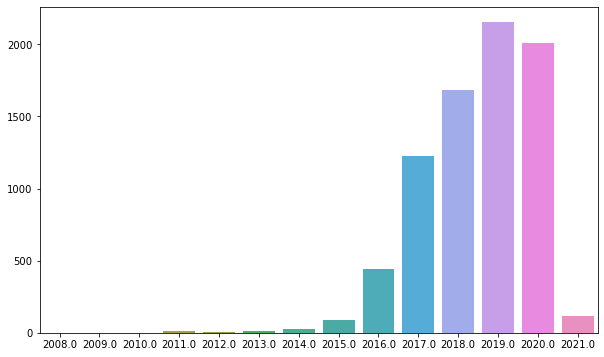

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x= df["Date_of_Release"].dt.year.value_counts().index,y=df["Date_of_Release"].dt.year.value_counts().values,data=df)

### Lets see count of tvshows and movies in dataset

In [80]:
df["Category"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [82]:
df["Category"].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

<AxesSubplot:>

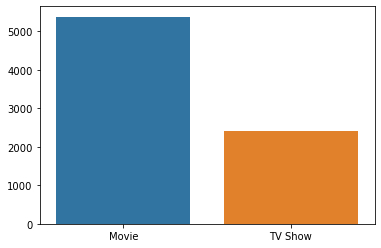

In [84]:
sns.barplot(x=df["Category"].value_counts().index,y=df["Category"].value_counts().values,data=df)

## Lets see what are movies   releases only in India

In [85]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_of_Release
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14


In [91]:
df[(df["Category"] == "Movie") & (df["Country"] == "India")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_of_Release
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019-04-01
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019-03-29
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018-09-01
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...
7766,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019-05-21
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019-12-15
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018-11-01
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018-07-01


### Lets see all the tvshows titles releases in uk & Type Comedies or Action

In [102]:
df[(df["Country"] == "United Kingdom") & (df["Type"] == "Comedies") | (df["Type"] == "Action")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_of_Release
1368,s1369,Movie,Christmas Survival,James Dearden,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,"November 1, 2019",TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters...",2019-11-01
1650,s1651,Movie,Dead in a Week (Or Your Money Back),Tom Edmunds,"Tom Wilkinson, Aneurin Barnard, Freya Mavor, M...",United Kingdom,"March 1, 2019",TV-MA,90 min,Comedies,After several failed attempts at taking his ow...,2019-03-01
2225,s2226,Movie,For Love or Money,Mark Murphy,"Robert Kazinsky, Samantha Barks, Ed Speleers, ...",United Kingdom,"August 16, 2019",TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...,2019-08-16
4210,s4211,Movie,"Monty Python Live (Mostly): One Down, Five to Go",Eric Idle,"John Cleese, Terry Gilliam, Eric Idle, Terry J...",United Kingdom,"October 2, 2018",TV-MA,137 min,Comedies,"Live from London in a sold-out final show, sur...",2018-10-02
4213,s4214,Movie,Monty Python: Live at The Hollywood Bowl,"Terry Hughes, Ian MacNaughton","Graham Chapman, John Cleese, Terry Gilliam, Er...",United Kingdom,"October 2, 2018",R,80 min,Comedies,Film clips and Terry Gilliam animations featur...,2018-10-02
4781,s4782,Movie,Parrot Sketch Not Included: Twenty Years of Mo...,Ian MacNaughton,"Steve Martin, John Cleese, Graham Chapman, Ter...",United Kingdom,"October 2, 2018",TV-14,72 min,Comedies,"Presented by Steve Martin, this anthology draw...",2018-10-02
4792,s4793,Movie,PATRICK (2019),Mandie Fletcher,"Beattie Edmondson, Ed Skrein, Tom Bennett, Jen...",United Kingdom,"May 16, 2019",TV-PG,94 min,Comedies,"When a schoolteacher inherits an adorable pug,...",2019-05-16
6109,s6109,Movie,The Bad Education Movie,Elliot Hegarty,"Jack Whitehall, Joanna Scanlan, Iain Glen, Eth...",United Kingdom,"December 15, 2018",TV-MA,87 min,Comedies,Britain's most ineffective but caring teacher ...,2018-12-15
6947,s6946,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,"December 12, 2017",TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...,2017-12-12


## Ratings

In [104]:
df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

<AxesSubplot:>

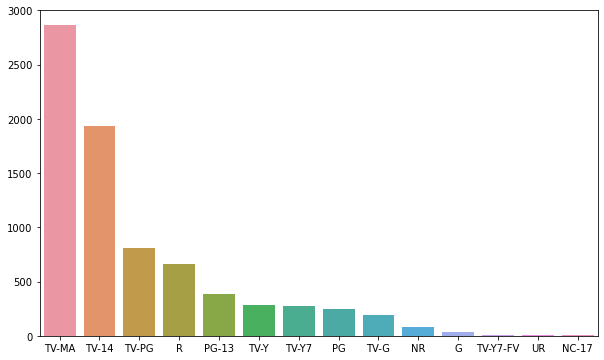

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Rating"].value_counts().index,y=df["Rating"].value_counts().values,data=df)

## Max duartion of movie

In [110]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_of_Release
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14


In [111]:
df[["Minutes","Unit"]] = df["Duration"].str.split(" ",expand=True)

In [113]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_of_Release,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,78,min


In [115]:
df["Minutes"].max()

'99'

It shows 99mins is max duration time seems.....

   ## Which Country has more no of movies 

In [127]:
count = df.groupby(["Category","Country"]).size().reset_index().rename(columns={0:"count"})
count

,Category,Country,count
0,Movie,Argentina,34
1,Movie,"Argentina, Brazil, France, Poland, Germany, De...",1
2,Movie,"Argentina, Chile",1
3,Movie,"Argentina, Chile, Peru",1
4,Movie,"Argentina, France",1
...,...,...,...
768,TV Show,"United States, South Korea, China",2
769,TV Show,"United States, Sweden",1
770,TV Show,"United States, United Kingdom",7
771,TV Show,"United States, United Kingdom, Australia",1


In [147]:
count[count["Category"]=="Movie"].sort_values(by="count",ascending=False).head(10)

,Category,Country,count
475,Movie,United States,1850
195,Movie,India,852
399,Movie,United Kingdom,193
44,Movie,Canada,118
346,Movie,Spain,89
115,Movie,Egypt,89
387,Movie,Turkey,73
299,Movie,Philippines,70
122,Movie,France,69
251,Movie,Japan,69


In [139]:
count[count["Category"]=="TV Show"].sort_values(by="count",ascending=False).head(10)

,Category,Country,count
741,TV Show,United States,705
722,TV Show,United Kingdom,204
667,TV Show,Japan,157
702,TV Show,South Korea,147
653,TV Show,India,71
714,TV Show,Taiwan,68
604,TV Show,Canada,59
593,TV Show,Australia,46
634,TV Show,France,46
707,TV Show,Spain,45


### We can clearly see that usa has more no.of movies and tvshows

([<matplotlib.patches.Wedge at 0x1edde71c6d0>,
 [Text(-0.3280304697814058, 1.0499504802108481, 'United States'),
  Text(-0.11232200636873547, -1.0942503218575272, 'India'),
  Text(0.8986109725703953, -0.6344275529767668, 'United Kingdom'),
  Text(1.0509422511757398, -0.3248390135031023, 'Canada'),
  Text(1.0955345485659844, -0.0990154174779095, 'Spain')],
 [Text(-0.17892571078985772, 0.5727002619331898, '59.64%'),
  Text(-0.06126654892840116, -0.5968638119222874, '27.47%'),
  Text(0.49015143958385193, -0.3460513925327819, '6.22%'),
  Text(0.5732412279140398, -0.1771849164562376, '3.80%'),
  Text(0.5975642992178096, -0.05400840953340518, '2.87%')])

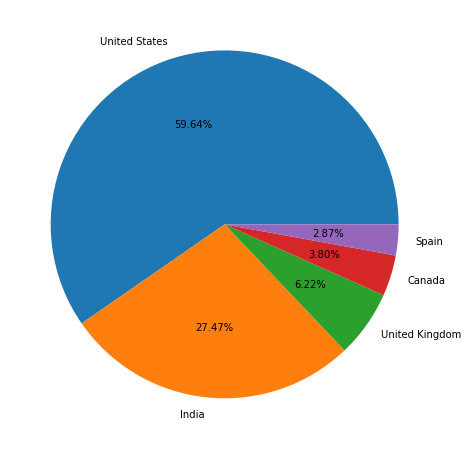

In [151]:
plt.figure(figsize=(8,8))
plt.pie(count[count["Category"]=="Movie"].sort_values(by="count",ascending=False).head(5)["count"],labels=count[count["Category"]=="Movie"].sort_values(by="count",ascending=False).head(5)["Country"],autopct="%1.2f%%")